In [36]:
import pandas as pd

filename = "/Users/tales.silveira/Desktop/cepedi/top_insta_influencers_data.csv"
df = pd.read_csv(filename)

## Análise exploratória e correlações

Informações Gerais:
<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               199 non-null    int64  
 1   channel_info       199 non-null    object 
 2   influence_score    199 non-null    int64  
 3   posts              199 non-null    float64
 4   followers          199 non-null    float64
 5   avg_likes          199 non-null    float64
 6   60_day_eng_rate    199 non-null    float64
 7   new_post_avg_like  7 non-null      float64
 8   total_likes        0 non-null      float64
 9   country            138 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 17.1+ KB
None

Estatísticas Descritivas:
             rank  influence_score         posts     followers     avg_likes  \
count  199.000000       199.000000    199.000000  1.990000e+02  1.990000e+02   
mean   100.160804        81.814070   3516.884422 

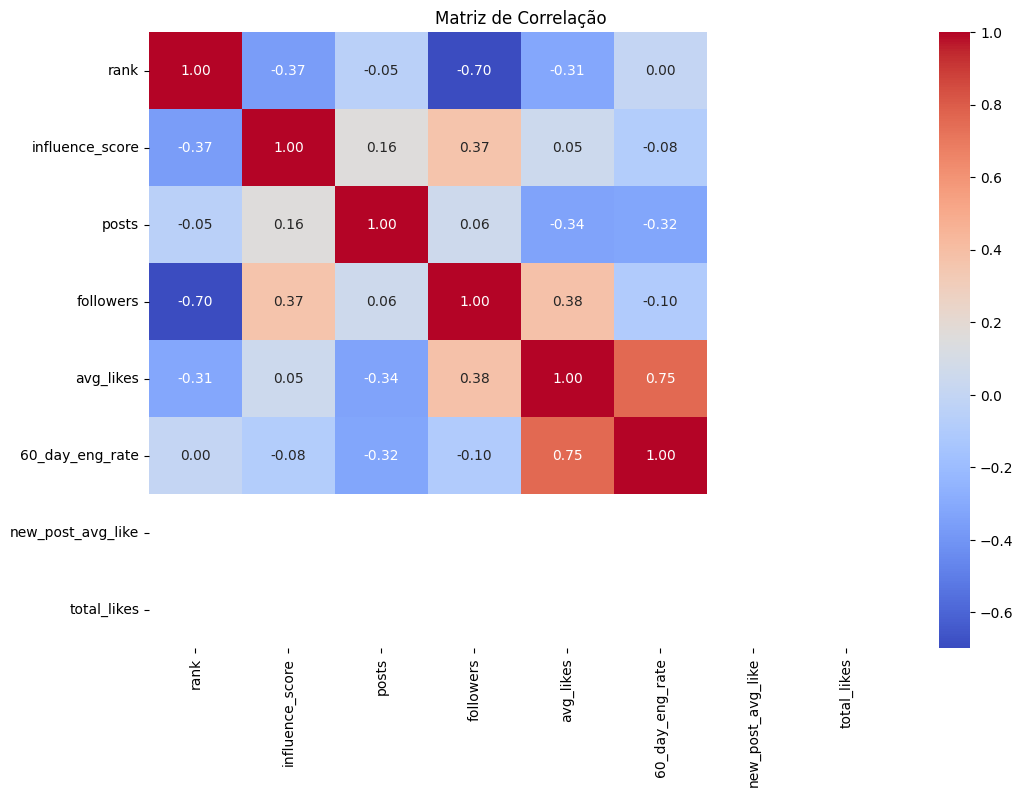

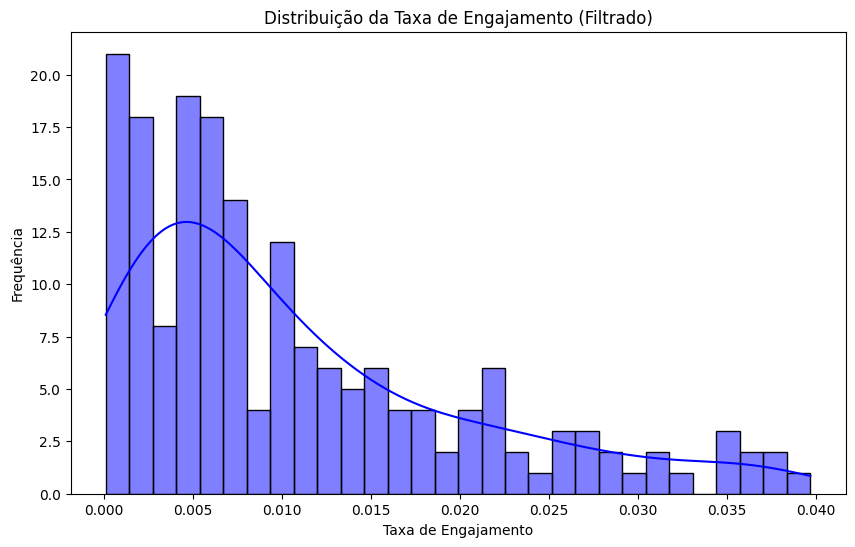

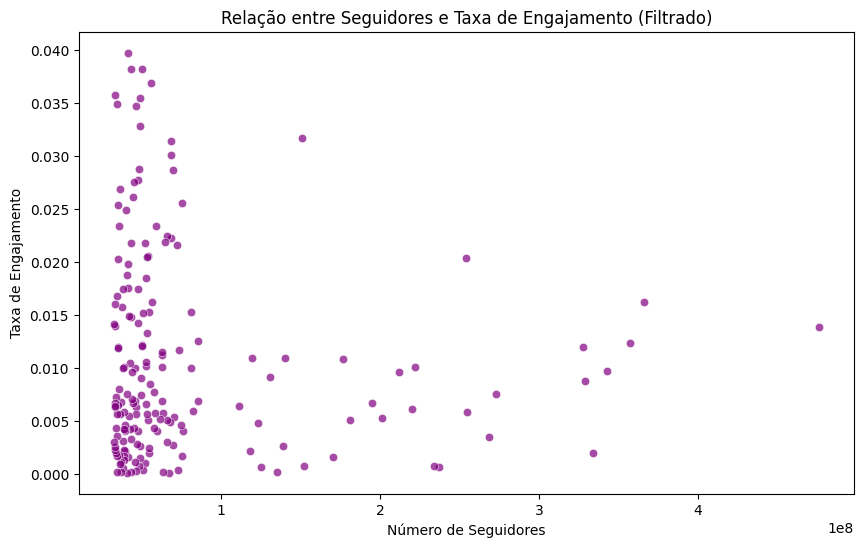

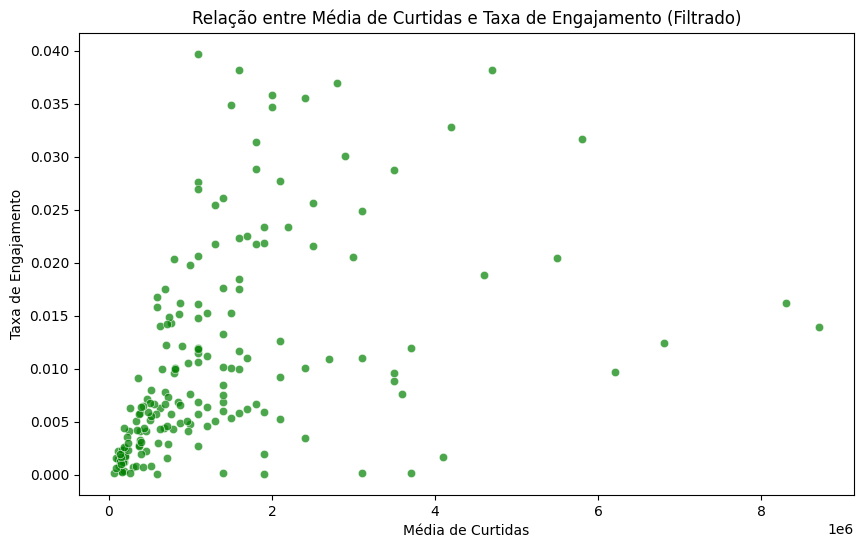

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("Informações Gerais:")
print(df.info())
print("\nEstatísticas Descritivas:")
print(df.describe())

numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Remoção de outliers 
Q1 = df['60_day_eng_rate'].quantile(0.25)
Q3 = df['60_day_eng_rate'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered = df[(df['60_day_eng_rate'] >= lower_bound) & (df['60_day_eng_rate'] <= upper_bound)]

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['60_day_eng_rate'], kde=True, bins=30, color='blue')
plt.title("Distribuição da Taxa de Engajamento (Filtrado)")
plt.xlabel("Taxa de Engajamento")
plt.ylabel("Frequência")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_filtered['followers'], y=df_filtered['60_day_eng_rate'], alpha=0.7, color='purple')
plt.title("Relação entre Seguidores e Taxa de Engajamento (Filtrado)")
plt.xlabel("Número de Seguidores")
plt.ylabel("Taxa de Engajamento")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_filtered['avg_likes'], y=df_filtered['60_day_eng_rate'], alpha=0.7, color='green')
plt.title("Relação entre Média de Curtidas e Taxa de Engajamento (Filtrado)")
plt.xlabel("Média de Curtidas")
plt.ylabel("Taxa de Engajamento")
plt.show()

## Pré-processamento dos dados

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def convert_to_number(value):
    if isinstance(value, str):
        value = value.lower()  
        if 'm' in value:
            return float(value.replace('m', '')) * 1_000_000
        elif 'k' in value:
            return float(value.replace('k', '')) * 1_000
    try:
        return float(value)  
    except ValueError:
        return None  

columns_to_convert = ['followers', 'avg_likes', 'posts']  
for col in columns_to_convert:
    df[col] = df[col].apply(convert_to_number)


X = df[['followers', 'avg_likes', 'posts']]  
y = df['60_day_eng_rate']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)       

print("Conjunto de treino normalizado (primeiras 5 linhas):")
print(X_train_scaled[:5])
print("\nConjunto de teste normalizado (primeiras 5 linhas):")
print(X_test_scaled[:5])


Conjunto de treino normalizado (primeiras 5 linhas):
[[-0.31642819 -0.18294226 -0.63842809]
 [-0.59883875 -0.69365546 -0.78872571]
 [ 0.01347869  1.67927545 -0.76036767]
 [ 0.76058298 -0.30991165 -0.98439618]
 [-0.43581084 -0.49930765 -1.001411  ]]

Conjunto de teste normalizado (primeiras 5 linhas):
[[-0.36777557 -0.41013282  1.91379549]
 [ 1.69382151  0.70584347 -0.61007005]
 [ 0.496144   -0.57942534  1.06305429]
 [-0.52566874 -0.51175065  0.43917742]
 [-0.45763347 -0.43611922 -0.73200963]]


## Modelo de Regressão Linear com Scikit-Learn

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def convert_percentage(value):
    if isinstance(value, str) and '%' in value:
        return float(value.replace('%', '')) / 100  
    try:
        return float(value)
    except ValueError:
        return None

df['60_day_eng_rate'] = df['60_day_eng_rate'].apply(convert_percentage)

df = df.dropna(subset=['60_day_eng_rate'])

X = df[['followers', 'posts', 'avg_likes']]  
y = df['60_day_eng_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)

print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)


MSE: 0.00026999271998450413
MAE: 0.010273671084633965
R²: 0.5622508650311114
Coeficientes: [-0.01636636  0.00029272  0.03327964]
Intercepto: 0.01881069182389937


## Implementação Manual com Gradiente Descendente

In [42]:
import numpy as np

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, theta, learning_rate, epochs):
    m = len(y)
    cost_history = []

    for _ in range(epochs):
        predictions = X.dot(theta)
        gradients = (1 / m) * X.T.dot(predictions - y)
        theta -= learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))
    
    return theta, cost_history

X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  
y_train_np = y_train.to_numpy().reshape(-1, 1)
theta = np.random.randn(X_b.shape[1], 1) 

learning_rate = 0.01
epochs = 1000
theta_final, cost_history = gradient_descent(X_b, y_train_np, theta, learning_rate, epochs)

print("Pesos finais:", theta_final)

Pesos finais: [[ 0.01881748]
 [-0.02151921]
 [ 0.00473983]
 [ 0.039779  ]]


## Visualização dos resultados

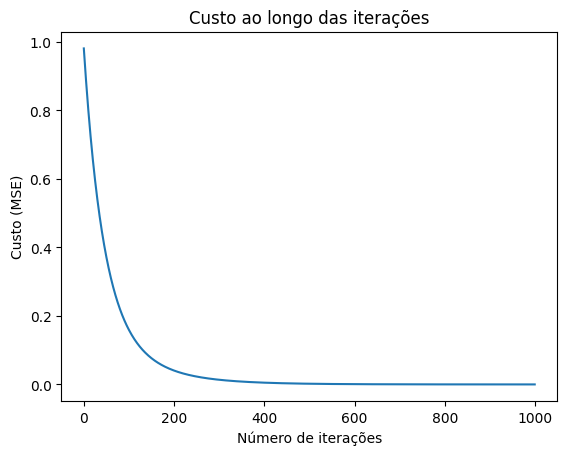

In [48]:
plt.plot(range(len(cost_history)), cost_history)
plt.title("Custo ao longo das iterações")
plt.xlabel("Número de iterações")
plt.ylabel("Custo (MSE)")
plt.show()